# 4 Multispectral Remote Sensing data

Earlier in this course, you worked with raster data derived from lidar remote sensing instruments. These rasters consisted of one layer or band and contained height values derived from lidar data. In this lesson, you will learn how to work with rasters containing multispectral imagery data stored within multiple bands (or layers).

## 4.1 Key Attributes of Spectral Remote Sensing Data

### Space vs Airborne data

- Remote sensing data can be collected from the ground, the air (using airplanes or helicopters) or from spac
- You can imagine that data that are collected from space are often of a lower spatial resolution than data collected from an airplane.
- For example the Landsat 8 satellite has a 16 day repeat cycle for the entire globe. This means that you can find a new image for an area, every 16 days. It takes a lot of time and financial resources to collect airborne data. 
- 
![image](https://user-images.githubusercontent.com/43855029/178364786-4ea8eafd-8840-4a79-8273-140103b9e44f.png)

### Bands and Wavelengths

#### Band

- A band represents a segment of the electromagnetic spectrum
- For example, the wavelength values between 800 nanometers (nm) and 850 nm might be one band captured by an imaging spectrometer.
- Often when you work with a multispectral dataset, the band information is reported as the center wavelength value. 

![image](https://user-images.githubusercontent.com/43855029/178365033-ab5bc8a1-f4f8-455f-a82f-7ba1c4ed3c45.png)

#### Spectral Resolution

The spectral resolution of a dataset that has more than one band, refers to the spectral width of each band in the dataset. In the image above, a band was defined as spanning 800-810 nm. The spectral width or spectral resolution of the band is thus 10 nm. 

#### Spatial Resolution

The spatial resolution of a raster represents the area on the ground that each pixel covers

![image](https://user-images.githubusercontent.com/43855029/178365578-637f7c37-7a3f-41b4-9535-33fe983ce00c.png)

The spatial resolution of a raster represents the area on the ground that each pixel covers. Source: Colin Williams, NEON.


![image](https://user-images.githubusercontent.com/43855029/178365594-37542bfb-6063-426f-a56c-4fcd3e781cb7.png)

## 4.2 Multispectral data processing with python

### Some functions:
- **rasterio.open** function: similar to opening raster data, this function from xarray is used to open multi-band raster data 
- **stack** function: import multi-band raster data
- **plot_rgb** function from earthpy is used again to plot the composite into a color image

![image](https://user-images.githubusercontent.com/43855029/178366020-66bf219a-ecfa-40b6-b638-9b534fff6e3c.png)

## 4.3 Working with Landsat data

At over 40 years, the Landsat series of satellites provides the longest temporal record of moderate resolution multispectral data of the Earth’s surface on a global basis. The Landsat record has remained remarkably unbroken, proving a unique resource to assist a broad range of specialists in managing the world’s food, water, forests, and other natural resources for a growing world population. It is a record unmatched in quality, detail, coverage, and value. Source: USGS


![image](https://user-images.githubusercontent.com/43855029/178366132-5c23649b-23b7-447a-b39d-7a7c981b66fb.png)

### Importing Landsat data


In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data("cold-springs-fire")
os.chdir(os.path.join(et.io.HOME, 
                      "earth-analytics", 
                      "data"))

#### Get list of all pre-cropped data and sort the data

# Create the path to your data
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

# Generate a list of tif files
post_fire_paths = glob(os.path.join(landsat_post_fire_path,
                                        "*band*.tif"))

# Sort the data to ensure bands are in the correct order
post_fire_paths.sort()
post_fire_paths


['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

#### Open a single band from your Landsat scene. 

Below you use the .squeeze() method to ensure that output xarray object only has 2 dimensions and not three.


In [2]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
band_1.shape


(177, 246)

Plotting band 1



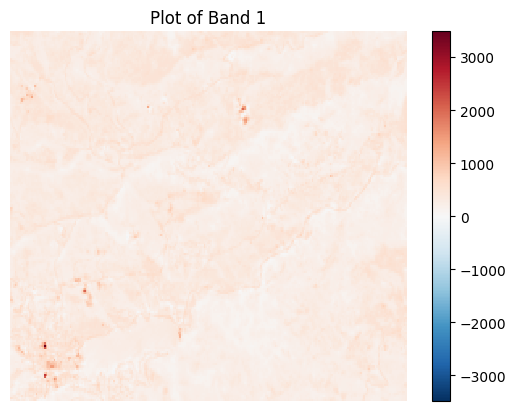

In [5]:

f, ax=plt.subplots()
band_1.plot.imshow(ax=ax)
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()


In [7]:
#### Creating a loop process to import multispectral images

def open_clean_bands(band_path):     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

# Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1
    
# OPTIONAL: Turn list of bands into a single xarray object    
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 
landsat_post_fire_xr.shape


(7, 177, 246)

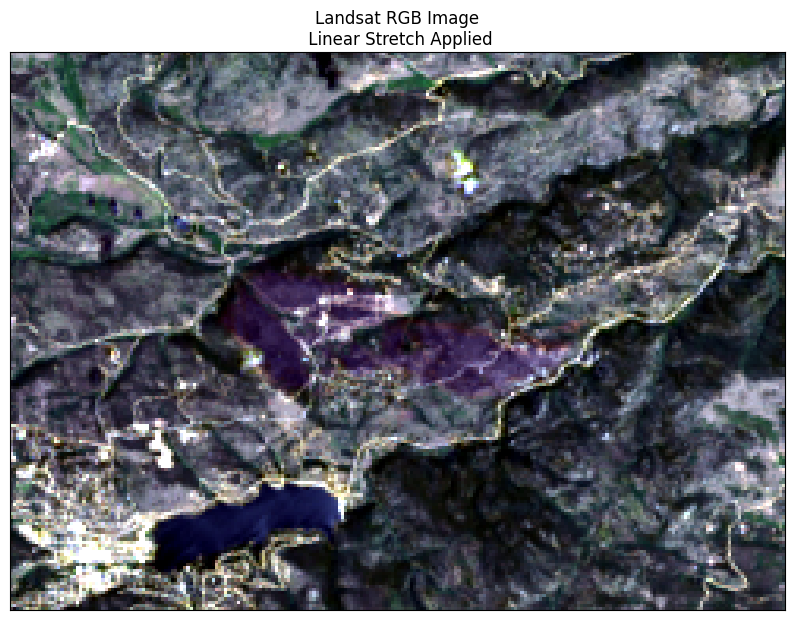

In [20]:

#### Plot this multispectral images using plot_rgb function from earthpy

ep.plot_rgb(landsat_post_fire_xr.values,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
        
plt.show()



## 4.4 MODIS

Moderate Resolution Imaging Spectrometer (MODIS) is a satellite-based instrument that continuously collects data over the Earth’s surface. Currently, MODIS has the finest temporal resolution of the publicly available remote sensing data, spanning the entire globe every 24 hrs.

MODIS collects data across 36 spectral bands; however, in this class, you will only work with the first 7 bands.

#### Import data

Here we use the same data set but with different modis layer:



In [15]:

# Create list of MODIS rasters for surface reflectance
modis_bands_pre_list = glob(os.path.join("cold-springs-fire",
                                         "modis",
                                         "reflectance",
                                         "07_july_2016",
                                         "crop",
                                         "*_sur_refl_b*.tif"))

# Sort the list of bands
modis_bands_pre_list.sort()
modis_bands_pre_list

#### Combine 7 bands from MODIS


['cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b01_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b02_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b03_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b04_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b05_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b06_1.tif',
 'cold-springs-fire/modis/reflectance/07_july_2016/crop/MOD09GA.A2016189.h09v05.006.2016191073856_sur_refl_b07_1.tif']

In [16]:


def combine_tifs(tif_list):  
    out_xr = []
    
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return xr.concat(out_xr, dim="band")

modis_bands_pre = combine_tifs(modis_bands_pre_list)


In [17]:
modis_bands_pre.shape

(7, 2400, 2400)

/lustre/work/client/users/tuev/.conda/envs/mygeos/lib/python3.8/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


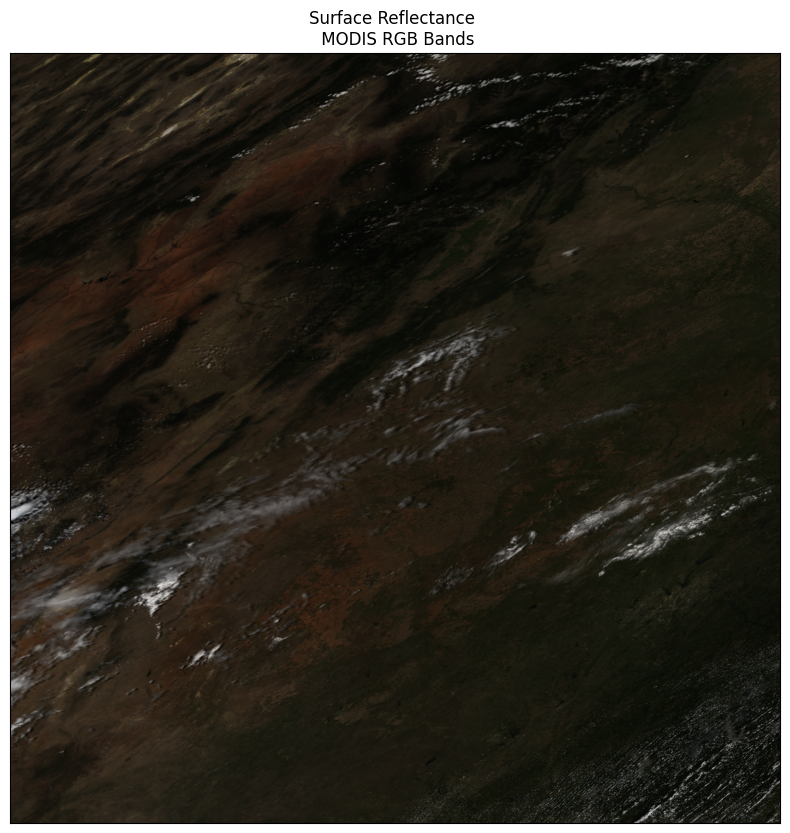

In [18]:

#### Plotting MODIS data using plot_rgb from earthpy


ep.plot_rgb(modis_bands_pre.values,
            rgb=[0, 3, 2],
            title="Surface Reflectance \n MODIS RGB Bands")
plt.show()


#### Explore the dataset

To start exploring the data, you can calculate the minimum and maximum values of select bands to see the range of values. For example, you can calculate these values for the first band (red) of the MODIS stack.



In [19]:

# Identify minimum and maximum values of band 1 (red)
print(modis_bands_pre[1].min(), modis_bands_pre[1].max())


<xarray.DataArray ()>
array(-100., dtype=float32)
Coordinates:
    band         int64 2
    spatial_ref  int64 0 <xarray.DataArray ()>
array(10039., dtype=float32)
Coordinates:
    band         int64 2
    spatial_ref  int64 0
